# Trailer: bio-image analysis, machine learning and bio-statistics with python
During this semester we will dive into image analysis, machine learning and bio-statistics with python. This notebook serves as a trailer of what we will be doing until July. Every step will be explained in detail in future sessions. This is just a trailer.

## Working with image data

In [1]:
# open an image file
from skimage.io import imread
image = imread("blobs.tif")

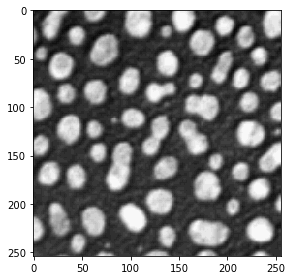

In [2]:
# visualizing an image
from skimage.io import imshow
imshow(image)

## Image segmentation

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


matplotlib_plugin.py (150): Low image data range; displaying image with stretched contrast.


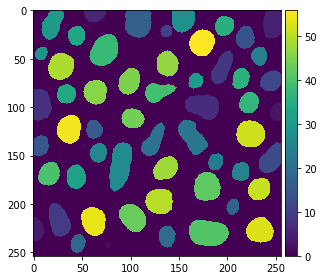

In [3]:
# normalize image
from csbdeep.utils import normalize
normalized_image = normalize(image, 1,99.8, axis=(0,1))

# load pretrained deep-learning model
from stardist.models import StarDist2D 
model = StarDist2D.from_pretrained('2D_versatile_fluo')

# predict labels
label_image, details = model.predict_instances(normalized_image)
imshow(label_image)

## Measurements and feature extraction

In [4]:
from skimage import measure

# analyse objects
table = measure.regionprops_table(label_image, intensity_image=image,
                                  properties=('area', 'mean_intensity'))

## Working with tables

In [5]:
# show table
import pandas as pd
dataframe = pd.DataFrame(table)
dataframe

,area,mean_intensity
0,37,115.027027
1,33,99.878788
2,182,192.395604
3,212,196.037736
4,491,208.130346
5,221,167.384615
6,693,196.121212
7,536,193.388060
8,475,168.016842
9,562,157.309609


## Statistical analysis

In [6]:
import numpy as np
print("Mean blob area is ", np.mean(dataframe['area']))

Mean blob area is  427.60714285714283
